In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Mac.csv')

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [4]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [5]:
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [6]:
df['yummy'].nunique()

2

In [7]:
df['Gender'].nunique()

2

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
oe1=OrdinalEncoder(categories=[['Yes','No']])

In [10]:
oe2=OrdinalEncoder(categories=[['Never',"Once a year","Every three months","Once a month","Once a week","More than once a week"]])

In [11]:
from sklearn.preprocessing import LabelEncoder 

In [12]:
le=LabelEncoder()

In [13]:
df['Gender']=le.fit_transform(df[['Gender']])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [14]:
df['Gender'].head()

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int32

In [15]:
df['yummy']=oe1.fit_transform(df[['yummy']])

In [16]:
df['spicy']=oe1.fit_transform(df[['spicy']])

In [17]:
df['convenient']=oe1.fit_transform(df[['convenient']])

In [18]:
df['fattening']=oe1.fit_transform(df[['fattening']])

In [19]:
df['greasy']=oe1.fit_transform(df[['greasy']])

In [20]:
df['fast']=oe1.fit_transform(df[['fast']])

In [21]:
df['cheap']=oe1.fit_transform(df[['cheap']])
df['tasty']=oe1.fit_transform(df[['tasty']])
df['expensive']=oe1.fit_transform(df[['expensive']])
df['healthy']=oe1.fit_transform(df[['healthy']])
df['disgusting']=oe1.fit_transform(df[['disgusting']])
df['VisitFrequency']=oe2.fit_transform(df[['VisitFrequency']])

In [22]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,-3,61,2.0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2,51,2.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,62,2.0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4,69,4.0,0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2,49,3.0,1


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss=StandardScaler()

In [25]:
df['Age']=ss.fit_transform(df[['Age']])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yummy           1453 non-null   float64
 1   convenient      1453 non-null   float64
 2   spicy           1453 non-null   float64
 3   fattening       1453 non-null   float64
 4   greasy          1453 non-null   float64
 5   fast            1453 non-null   float64
 6   cheap           1453 non-null   float64
 7   tasty           1453 non-null   float64
 8   expensive       1453 non-null   float64
 9   healthy         1453 non-null   float64
 10  disgusting      1453 non-null   float64
 11  Like            1453 non-null   object 
 12  Age             1453 non-null   float64
 13  VisitFrequency  1453 non-null   float64
 14  Gender          1453 non-null   int32  
dtypes: float64(13), int32(1), object(1)
memory usage: 164.7+ KB


In [27]:
df['Like'].value_counts()

3               229
2               187
0               169
4               160
1               152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [28]:
df[df['Like']=="I hate it!-5"]=-5

In [29]:
df[df['Like']=="I love it!+5"]=5

In [30]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [31]:
from sklearn.cluster import KMeans

In [32]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


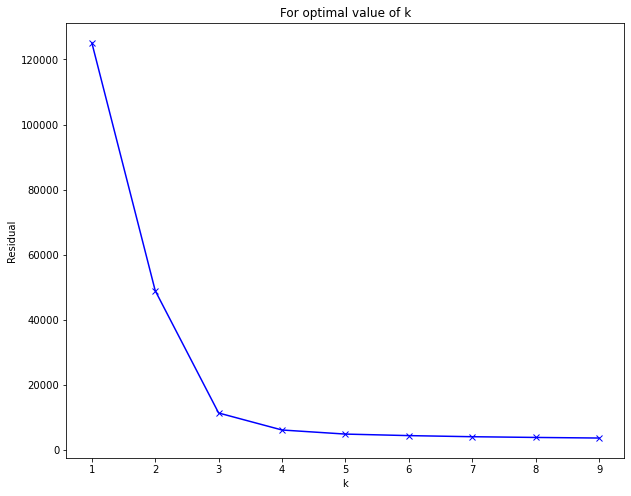

In [34]:
plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Residual')
plt.title('For optimal value of k')
plt.show()

In [35]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)

KMeans(n_clusters=3)